In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

## 1. RAW Data Loading

In [7]:
#!pip install pandas_datareader
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
import pandas_datareader.data as web
# web.DataReader('종목번호','naver', start='시작일', end='종료일')
df = web.DataReader('005930', 'naver', 
                    start='2022-05-01',
                    end = '2023-05-11')
df = df[['Close','Volume']]
df = df.astype('int')
df = df.reindex(pd.date_range('2022-05-01','2023-05-11'))
df = df.interpolate()
df = df.dropna()
df = df.astype('int')

In [8]:
df

,Close,Volume
2022-05-02,67300,14106184
2022-05-03,67500,14168875
2022-05-04,67900,11505248
2022-05-05,67200,12930702
2022-05-06,66500,14356156
...,...,...
2023-05-07,65700,9501789
2023-05-08,65900,9405365
2023-05-09,65300,9366861
2023-05-10,64600,13057727


## 2. Exponential Smoothing (지수평활법)
- ARIMA 대비 상대적으로 직관적으로 이해가 쉬움
- 시계열 자료의 구성 요소가 변동이 느리거나 매우 규칙적(periodic)일 때 예측 정확도가 높음

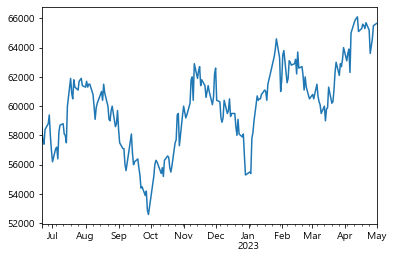

In [30]:
x_train = df['Close'].iloc[50:-10]
x_test = df['Close'].iloc[-10:]
x_train.plot();

### 시계열 특성에 따른 지수 평활법
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F998CCD355E114E0B3E'>

In [31]:
## exponential smoothing in Python
#!pip install statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Simple Exponential Smoothing : No Trend, No Seasonality
fit1 = SimpleExpSmoothing(x_train, 
                          initialization_method="estimated").fit()

# Trend : Linear Trend, No Seasoanlity
fit2 = Holt(x_train, 
            initialization_method="estimated").fit()

# Exponential trend : Quadratic Trend, No Seasoanlity
fit3 = Holt(x_train,
            exponential=True, 
            initialization_method="estimated").fit()


# Additive damped trend : Linear Trend, Fixed
fit4 = Holt(x_train,
            damped_trend=True, 
            initialization_method="estimated").fit()

# Multiplicative damped trend : Quadratic Trend, Increasing
fit5 = Holt(x_train,
            exponential=True, 
            damped_trend=True, 
            initialization_method="estimated").fit()

## Holt's Winters's method for time series data with Seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

season = 10
# additive model for fixed seasonal variation
fit6 = HWES(x_train, 
             seasonal_periods=season, 
             trend='add', 
             seasonal='add').fit(optimized=True, use_brute=True)

# multiplicative model for increasing seasonal variation
fit7 = HWES(x_train, 
             seasonal_periods=season, 
             trend='add', 
             seasonal='mul').fit(optimized=True, use_brute=True)

C:\Users\MOON\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\MOON\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\MOON\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\MOON\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\MOON\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\MOON\AppData\Roaming\Python\Pyt

In [32]:
forecast_1 = fit1.forecast(10)
forecast_2 = fit2.forecast(10)
forecast_3 = fit3.forecast(10)
forecast_4 = fit4.forecast(10)
forecast_5 = fit5.forecast(10)
forecast_6 = fit6.forecast(10)
forecast_7 = fit7.forecast(10)

In [34]:
t_p = pd.DataFrame({'f1': forecast_1, 
                    'f2': forecast_2, 
                    'f3': forecast_3, 
                    'f4': forecast_4, 
                    'f5': forecast_5, 
                    'f6': forecast_6, 
                    'f7': forecast_7})

In [35]:
t_p

,f1,f2,f3,f4,f5,f6,f7
2023-05-02,65649.560352,65653.115376,65653.781946,65649.105759,65676.678665,65694.157510,65700.765406
2023-05-03,65649.560352,65657.571005,65658.885610,65649.660573,65703.754606,65960.408714,65983.114208
2023-05-04,65649.560352,65662.026634,65663.989671,65650.209839,65730.570783,66464.267164,66546.208034
2023-05-05,65649.560352,65666.482264,65669.094129,65650.753613,65757.129579,66611.093865,66709.104125
2023-05-06,65649.560352,65670.937893,65674.198983,65651.291948,65783.433358,66569.388877,66650.175474
2023-05-07,65649.560352,65675.393523,65679.304235,65651.824900,65809.484464,66782.764308,66848.004854
2023-05-08,65649.560352,65679.849152,65684.409883,65652.352523,65835.285221,66513.413449,66536.425061
2023-05-09,65649.560352,65684.304781,65689.515928,65652.874870,65860.837934,66419.094490,66429.146155
2023-05-10,65649.560352,65688.760411,65694.622370,65653.391993,65886.144890,66461.916982,66470.650002
2023-05-11,65649.560352,65693.216040,65699.729209,65653.903944,65911.208355,66384.751733,66390.319110


In [36]:
t_p.sub(x_test, axis=0).abs().mean()

f1     449.824141
f2     461.494098
f3     463.253984
f4     450.880360
f5     543.060008
f6    1117.294207
f7    1156.391243
dtype: float64